In [1]:
%%javascript
// Git Commit Button - JavaScript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_NAME = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [2]:
# Git Commit Button
from IPython.display import display, Javascript
import ipywidgets as widgets
import sh

commit_button = widgets.Button(description="Git commit")
display(commit_button)
# display_button = widgets.Button(description="Git commit")
# display(button)

def do_commit(b):
    display(Javascript('IPython.notebook.save_checkpoint();'))
    print(sh.git.add(NOTEBOOK_NAME))
    print(sh.git.status())
    print(sh.git.commit(m="Automatic commit triggered by in-script button"))
    print(sh.git.push("origin","master"))

#     print(git.status())

commit_button.on_click(do_commit)

Button(description='Git commit', style=ButtonStyle())

number of zeros 0
number of rows 56
number of cols 54
number of zeros in col 1 0
number of zeros in col  0  :  0
number of zeros in col  1  :  0
number of zeros in col  2  :  56
number of zeros in col  3  :  0
number of zeros in col  4  :  0
number of zeros in col  5  :  56
number of zeros in col  6  :  0
number of zeros in col  7  :  0
number of zeros in col  8  :  56
number of zeros in col  9  :  9
number of zeros in col  10  :  9
number of zeros in col  11  :  56
number of zeros in col  12  :  27
number of zeros in col  13  :  27
number of zeros in col  14  :  56
number of zeros in col  15  :  0
number of zeros in col  16  :  0
number of zeros in col  17  :  56
number of zeros in col  18  :  0
number of zeros in col  19  :  0
number of zeros in col  20  :  56
number of zeros in col  21  :  0
number of zeros in col  22  :  0
number of zeros in col  23  :  56
number of zeros in col  24  :  0
number of zeros in col  25  :  0
number of zeros in col  26  :  56
number of zeros in col  27 

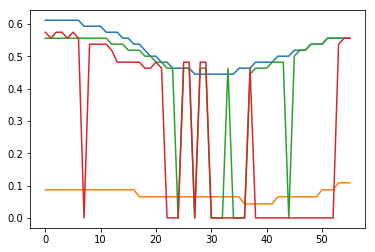

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fileName = "storage/data_2d.csv"
data = np.genfromtxt(fileName, delimiter=",")
print("number of zeros", np.sum(data[:,0]==0))
print("number of rows", len(data[:,0]))
print("number of cols", len(data[0,:]))


print("number of zeros in col 1", np.sum(data[:,1]==0))

for i in range(54): 
    print("number of zeros in col ", i, " : ", np.sum(data[:,i]==0))
    
    
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(data[:,9])
plt.plot(data[:,12])


In [4]:
np.linspace(.47, .6, 5)

array([0.47  , 0.5025, 0.535 , 0.5675, 0.6   ])

In [5]:
for col in range(data.shape[1]):
    if not np.all(data[:,col]==0):
        # extrapolate at the top
        if data[0,col]==0:
            for i, val in enumerate(data[:,col]): 
                if val!=0:
                    gapEnd = i
                    break
            data[0:gapEnd,col] = val

        # extrapolate at the bottom
        if data[-1,col]==0:
            for i, val in reversed(list(enumerate(data[:,col]))): 
                if val!=0:
                    gapStart = i
                    break
            data[gapStart:,col] = val

        # interpolate 
        while np.any(data[:,col]==0):
            for i, val in enumerate(data[:,col]): 
                if val==0:
                    gapStart = i
                    for j, val2 in enumerate(data[gapStart:,col], gapStart): 
                        if val2!=0:
                            gapEnd = j
                            break
                    break
            # create the linspace
            data[gapStart-1:gapEnd+1, col] = np.linspace(data[gapStart-1,col], data[gapEnd,col], gapEnd-gapStart+2)

data[:,col]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [6]:
#list(reversed(list(enumerate(data[:,12]))))

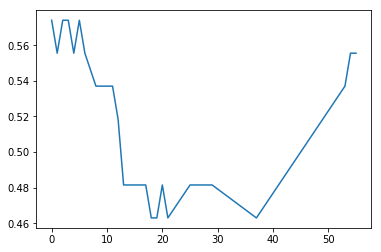

In [7]:
plt.plot(data[:,12])

In [8]:
b = np.array([1.1, 1.3, 4.3, 4.6, 3.7, 3.9])
np.insert(b, 0, [5, 6])

padding = 10
startPaddingList = np.repeat(data[0,12],padding)
print(startPaddingList)
np.insert(data[:,12], 0, startPaddingList)

[0.57407407 0.57407407 0.57407407 0.57407407 0.57407407 0.57407407
 0.57407407 0.57407407 0.57407407 0.57407407]


array([0.57407407, 0.57407407, 0.57407407, 0.57407407, 0.57407407,
       0.57407407, 0.57407407, 0.57407407, 0.57407407, 0.57407407,
       0.57407407, 0.55555556, 0.57407407, 0.57407407, 0.55555556,
       0.57407407, 0.55555556, 0.5462963 , 0.53703704, 0.53703704,
       0.53703704, 0.53703704, 0.51851852, 0.48148148, 0.48148148,
       0.48148148, 0.48148148, 0.48148148, 0.46296296, 0.46296296,
       0.48148148, 0.46296296, 0.46759259, 0.47222222, 0.47685185,
       0.48148148, 0.48148148, 0.48148148, 0.48148148, 0.48148148,
       0.47916667, 0.47685185, 0.47453704, 0.47222222, 0.46990741,
       0.46759259, 0.46527778, 0.46296296, 0.46759259, 0.47222222,
       0.47685185, 0.48148148, 0.48611111, 0.49074074, 0.49537037,
       0.5       , 0.50462963, 0.50925926, 0.51388889, 0.51851852,
       0.52314815, 0.52777778, 0.53240741, 0.53703704, 0.55555556,
       0.55555556])

In [9]:
# padding

padding = 10
targetArray = np.empty([data.shape[0]+2*padding, data.shape[1]])

for col in range(data.shape[1]):
    startPaddingList = np.repeat(data[0,col],padding)
    endPaddingList = np.repeat(data[-1,col], padding)
    tempInsertArray = np.insert(data[:,col], 0, startPaddingList)
    tempAppendArray = np.append(tempInsertArray, endPaddingList)
    targetArray[:,col] = tempAppendArray
    targetArray[:,col]
data = targetArray
data

array([[0.61111111, 0.08695652, 0.        , ..., 0.62962963, 0.08695652,
        0.        ],
       [0.61111111, 0.08695652, 0.        , ..., 0.62962963, 0.08695652,
        0.        ],
       [0.61111111, 0.08695652, 0.        , ..., 0.62962963, 0.08695652,
        0.        ],
       ...,
       [0.55555556, 0.10869565, 0.        , ..., 0.59259259, 0.08695652,
        0.        ],
       [0.55555556, 0.10869565, 0.        , ..., 0.59259259, 0.08695652,
        0.        ],
       [0.55555556, 0.10869565, 0.        , ..., 0.59259259, 0.08695652,
        0.        ]])

In [10]:
from scipy import signal

# Convolve
for i in range(len(data[0,:])):
    win = signal.hann(10)
    data[:,i] = signal.convolve(data[:,i], win, mode='same') / sum(win)

In [11]:
data = data[padding:-padding,:]

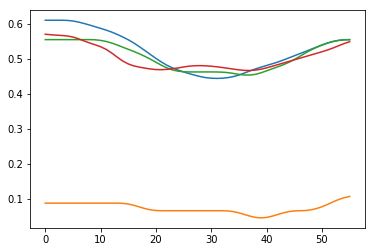

In [12]:
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(data[:,9])
plt.plot(data[:,12])